In [17]:
import pandas as pd
import urllib.request
import json
import matplotlib.pyplot as plt
import os

In [18]:
with urllib.request.urlopen("https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json") as url:
    data = json.loads(url.read().decode())

df = pd.DataFrame(data)

In [19]:
df.describe()


,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
count,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,4.307350,4.307350,12.895320,25.448011,2.920388,11.022443,20.405499,3.146246,14.768198,24.848020,5.521437
std,0.814412,0.814412,21.839948,42.758159,9.258972,19.136320,33.189081,9.559611,26.047057,42.345579,14.460565
min,4.000000,4.000000,0.192973,0.323886,0.007456,0.134686,0.178059,0.007456,0.123169,0.220846,0.009268
25%,4.000000,4.000000,0.658488,1.243804,0.147432,0.514150,0.888043,0.164668,0.742915,1.180960,0.306071
50%,4.000000,4.000000,2.123456,4.703514,0.279876,1.932503,4.008014,0.304374,2.159995,3.777277,0.600597
75%,4.000000,4.000000,14.810982,28.312051,0.674444,13.430288,24.986504,0.801416,15.150233,27.551533,1.840563
max,10.000000,10.000000,121.301055,179.165483,81.764483,121.244083,177.961811,81.791505,157.387474,179.165483,144.472533


In [20]:
df.dtypes

name             object
gt_corners      float64
rb_corners      float64
mean            float64
max             float64
min             float64
floor_mean      float64
floor_max       float64
floor_min       float64
ceiling_mean    float64
ceiling_max     float64
ceiling_min     float64
dtype: object

In [21]:
df['name']

0           Schlafzimmer
1                  Küche
2               Bathroom
3           Lounge/Diner
4             Essbereich
              ...       
1342      Master Bedroom
1343    Master Bedroom 2
1344            Zimmer I
1345    Hallway Bathroom
1346           Bedroom 4
Name: name, Length: 1347, dtype: object

In [22]:
df.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '1337', '1338', '1339', '1340', '1341', '1342', '1343', '1344', '1345',
       '1346'],
      dtype='object', length=1347)

In [23]:
class PlotDrawer:
    def __init__(self, plots_folder):
        self.plots_folder = plots_folder
        os.makedirs(self.plots_folder, exist_ok=True)
    
    def draw_plots(self, data):
        df = pd.DataFrame(data)
        
        for column in df.columns:
            if column not in ['name', 'gt_corners', 'rb_corners']:
                plt.figure(figsize=(10, 6))
                plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
                plt.title(f'Histogram of {column}')
                plt.xlabel(column)
                plt.ylabel('Frequency')
                plt.grid(True)
                plt.tight_layout()
                
                plot_path = os.path.join(self.plots_folder, f'{column}_histogram.png')
                plt.savefig(plot_path)
                plt.close()
                
                print(f'Plot saved: {plot_path}')
        
        return [os.path.join(self.plots_folder, file) for file in os.listdir(self.plots_folder)]


In [24]:
plots_folder = 'plots'

drawer = PlotDrawer(plots_folder)

plot_paths = drawer.draw_plots(data)

print("Paths to saved plots:")
for plot in plot_paths:
    print(plot)

Plot saved: plots\mean_histogram.png
Plot saved: plots\max_histogram.png
Plot saved: plots\min_histogram.png
Plot saved: plots\floor_mean_histogram.png
Plot saved: plots\floor_max_histogram.png
Plot saved: plots\floor_min_histogram.png
Plot saved: plots\ceiling_mean_histogram.png
Plot saved: plots\ceiling_max_histogram.png
Plot saved: plots\ceiling_min_histogram.png
Paths to saved plots:
plots\ceiling_max_histogram.png
plots\ceiling_mean_histogram.png
plots\ceiling_min_histogram.png
plots\floor_max_histogram.png
plots\floor_mean_histogram.png
plots\floor_min_histogram.png
plots\max_histogram.png
plots\mean_histogram.png
plots\min_histogram.png


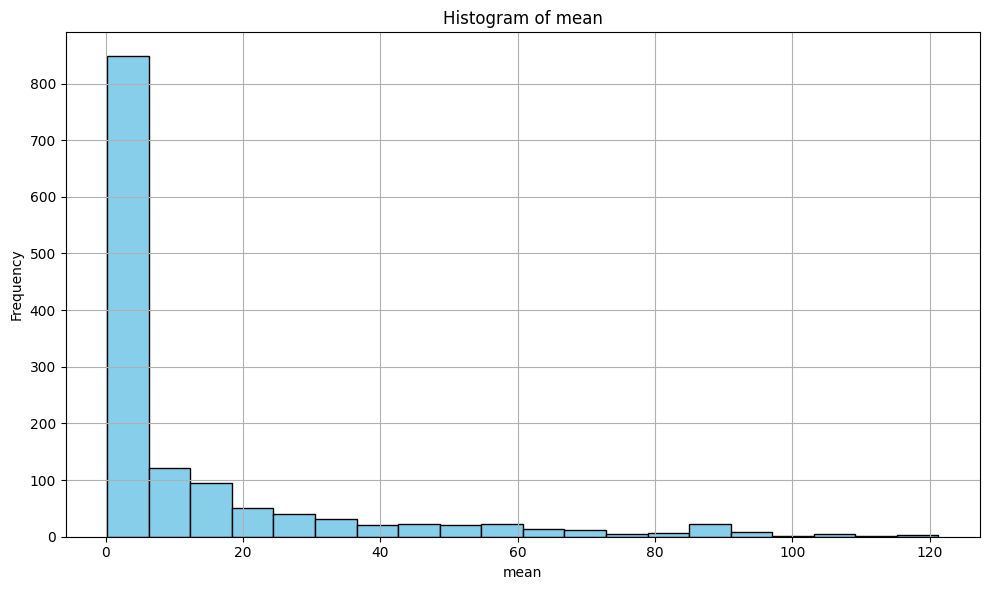

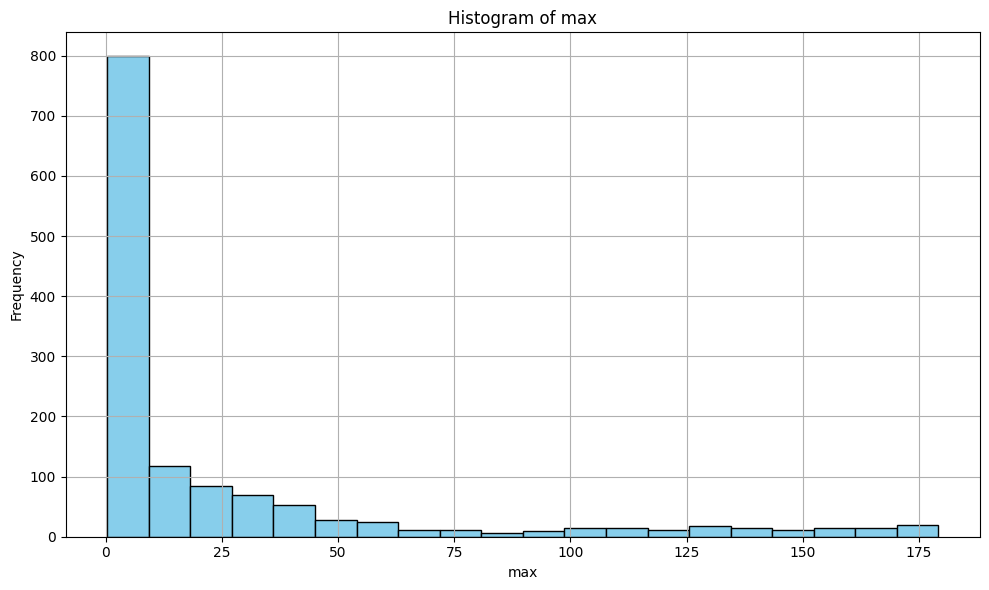

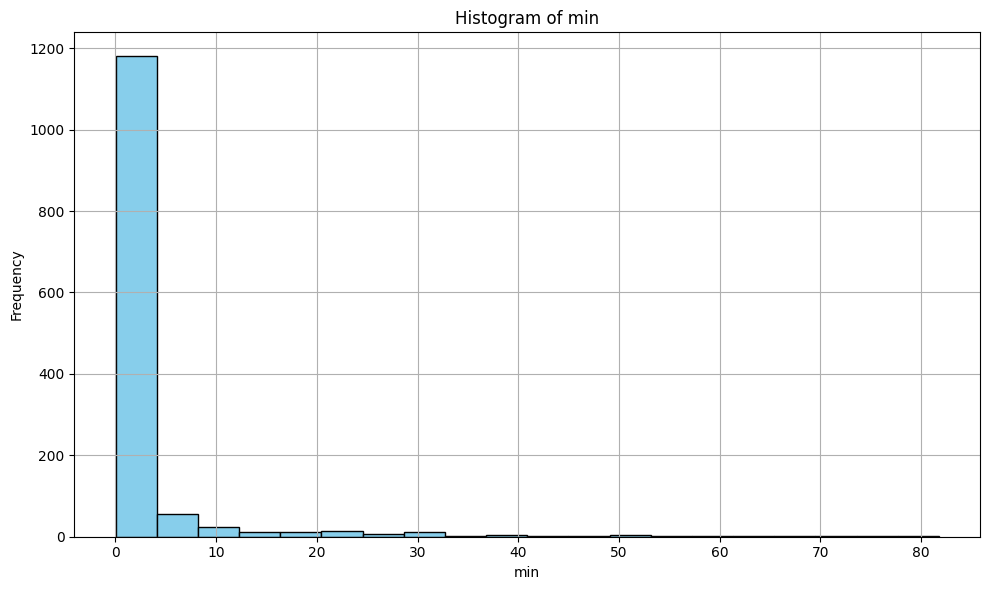

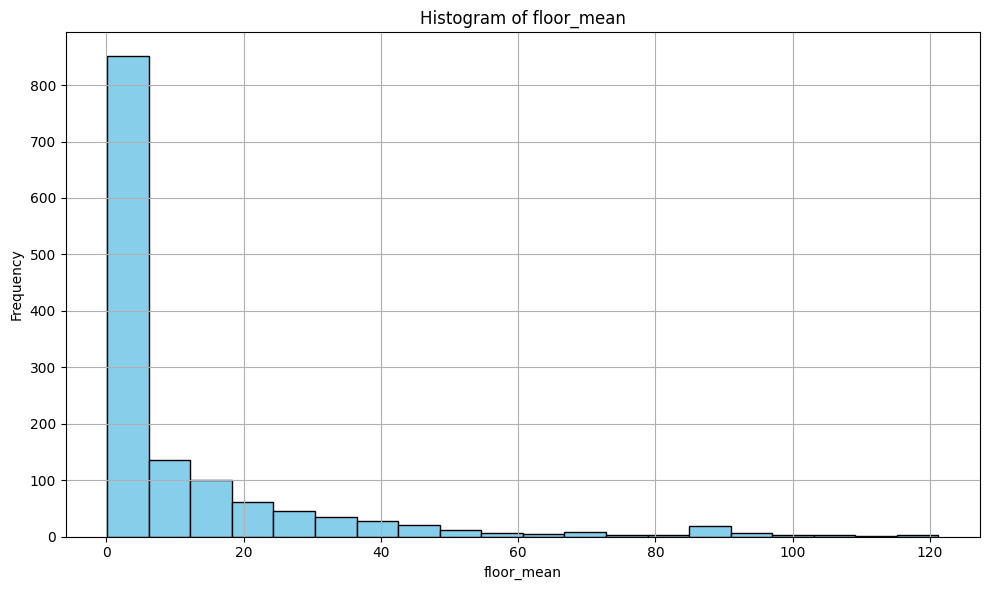

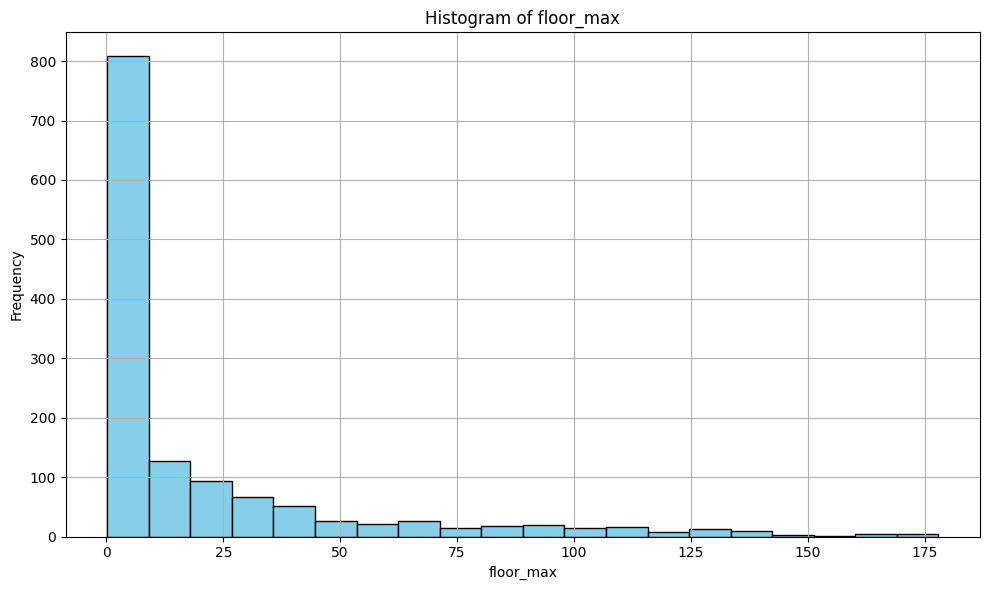

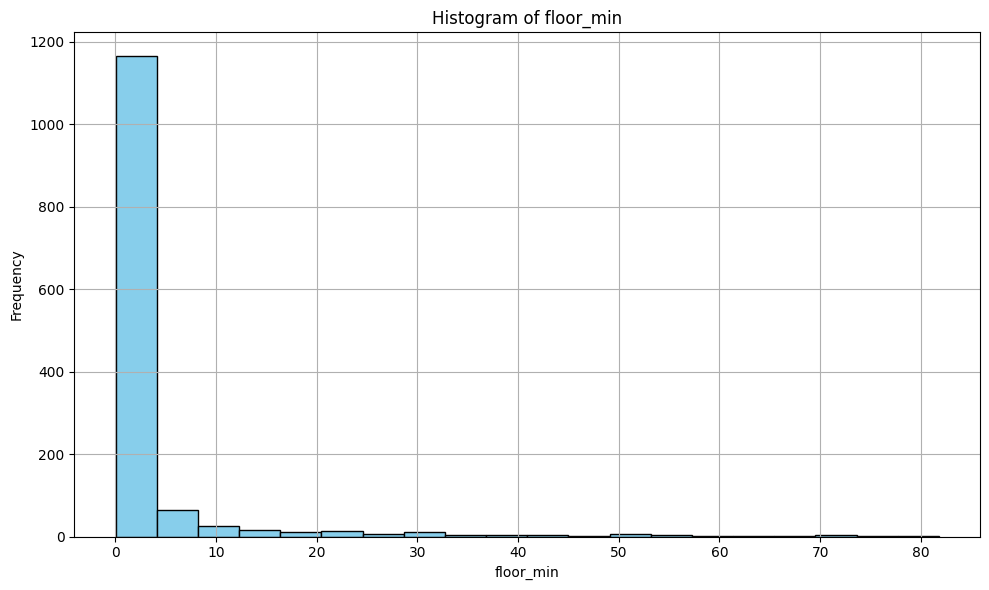

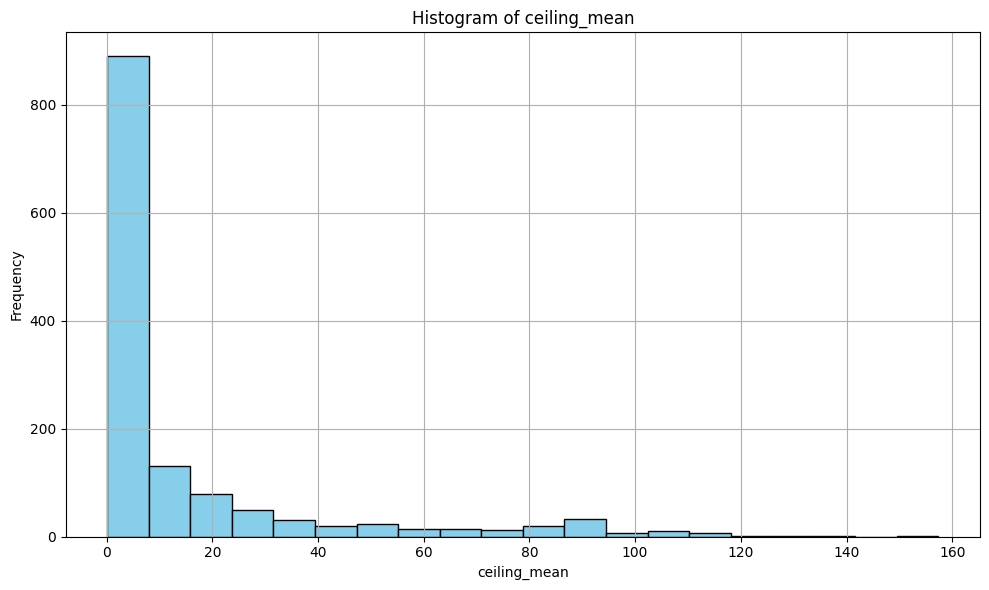

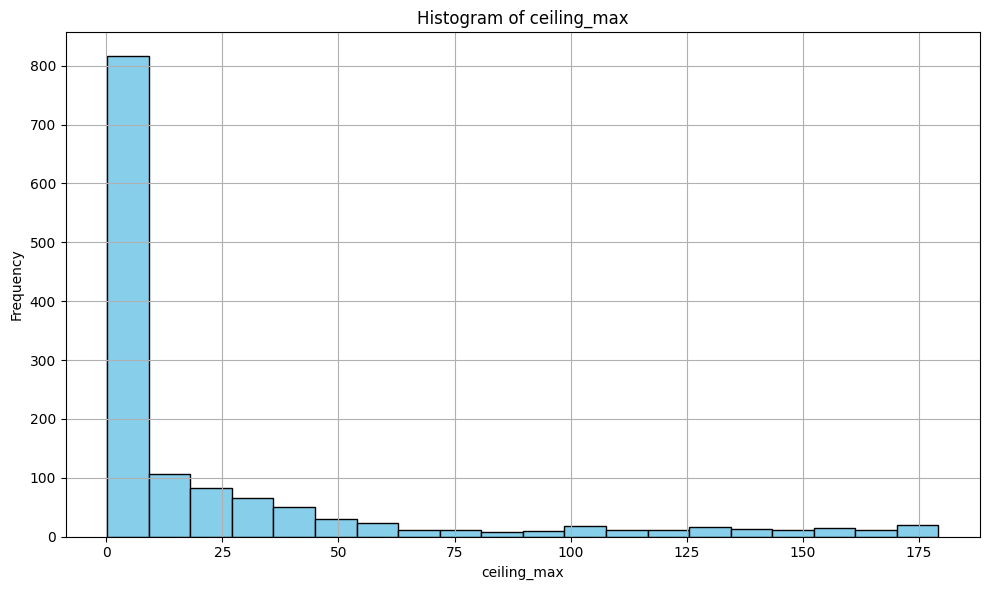

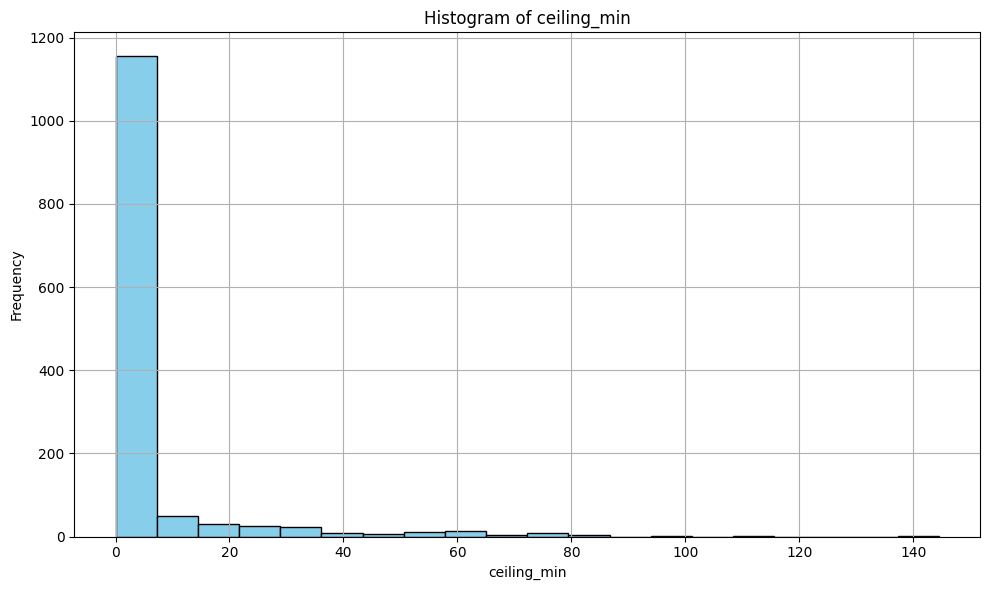

In [25]:
for column in df.columns:
    if column not in ['name', 'gt_corners', 'rb_corners']:
        plt.figure(figsize=(10, 6))
        plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.tight_layout()
        plt.show()